In [ ]:
## THIRD PHASE PRACTICE PROJECT

In [ ]:
## GLASS IDENTIFICATION

In [ ]:
## Importing Necassary libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_roc_curve, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [ ]:
## Importing DataSet

In [10]:
column_names = ['id_number','refractive_index','sodium','magnesium','aluminium','silicon','potassium','calcium','barium','iron','glass_type']
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\glass.csv" , names=column_names)
df

,id_number,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
## Now we have 214 rows and 11 columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_number         214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   sodium            214 non-null    float64
 3   magnesium         214 non-null    float64
 4   aluminium         214 non-null    float64
 5   silicon           214 non-null    float64
 6   potassium         214 non-null    float64
 7   calcium           214 non-null    float64
 8   barium            214 non-null    float64
 9   iron              214 non-null    float64
 10  glass_type        214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [14]:
df.isnull().sum()

id_number           0
refractive_index    0
sodium              0
magnesium           0
aluminium           0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
glass_type          0
dtype: int64

In [ ]:
## We can note that we have no null in this DatSet.
## We can see that we have no use of id_number this columns, so we should drop this coloumn

In [15]:
df.drop(['id_number'], axis=1 , inplace= True)
df

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
## Now we have rows and 10 columns 

In [16]:
df.describe()

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,glass_type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
## Now we need to alter our target variable into two class:
## Window glass= 0 for (1-4)glass type
## Non-Window glass = 1 for (5-7)glass type

In [20]:
glass = []
for i in df['glass_type']:
    if i>=5:
        glass.append(1)
    else:
        glass.append(0)
        
df['glass_type']=glass
df.head(5)    

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


In [21]:
df.tail(5)

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,glass_type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,1
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,1


In [ ]:
## Now we can visualize the dataset
## Using distplot

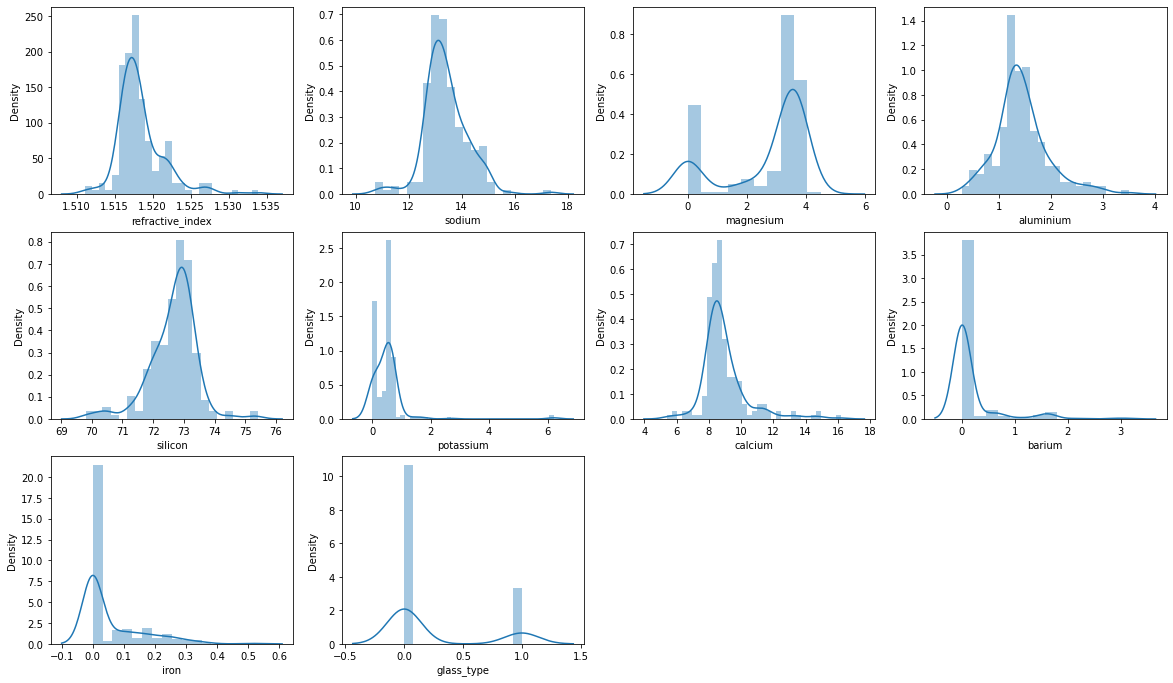

In [24]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
. There is some or more skewness in all of our features except look like silicon).
. Now we are using z-score to reduce skewness (value = 3)

In [26]:
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[['refractive_index','sodium','magnesium','aluminium','silicon','potassium','calcium','barium','iron']])
abs_z_score= np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(194, 10)

In [ ]:
## Now let check

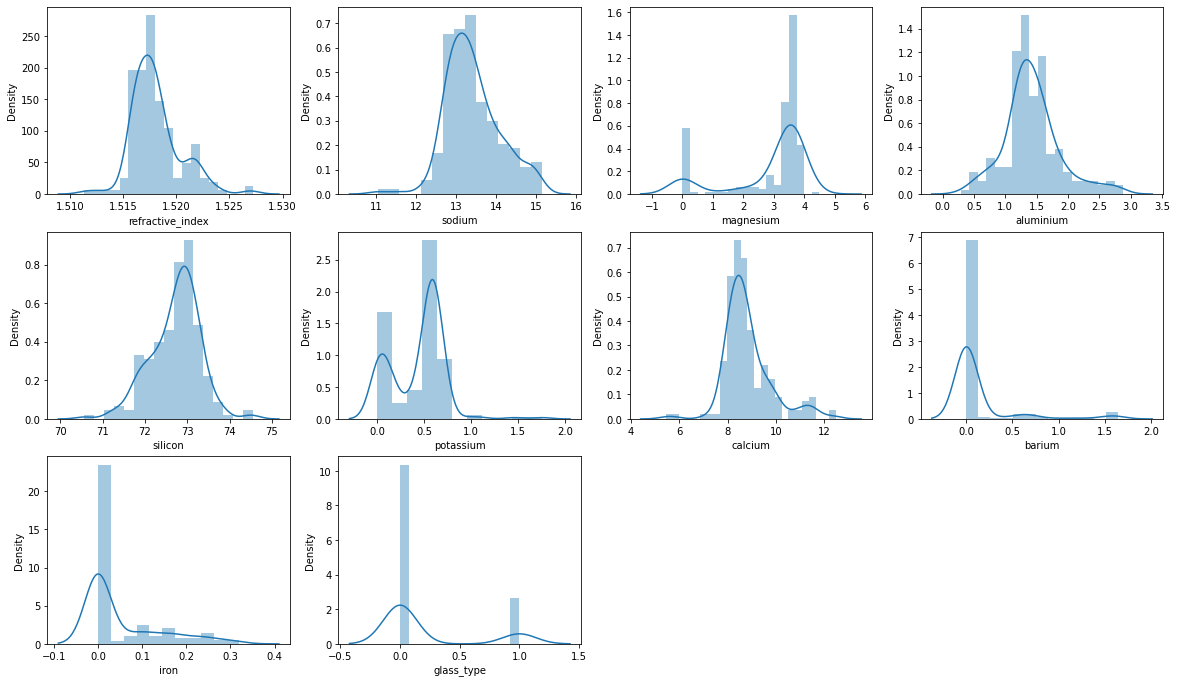

In [27]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
## We can note that the skewness has decreased but still a lot of skewness.
## Again we are doing one more operation

In [28]:
from scipy.stats import zscore

z_score = zscore(df[['refractive_index','sodium','magnesium','aluminium','silicon','potassium','calcium','barium','iron']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)
df = df[filtering_entry]
df.shape

(175, 10)

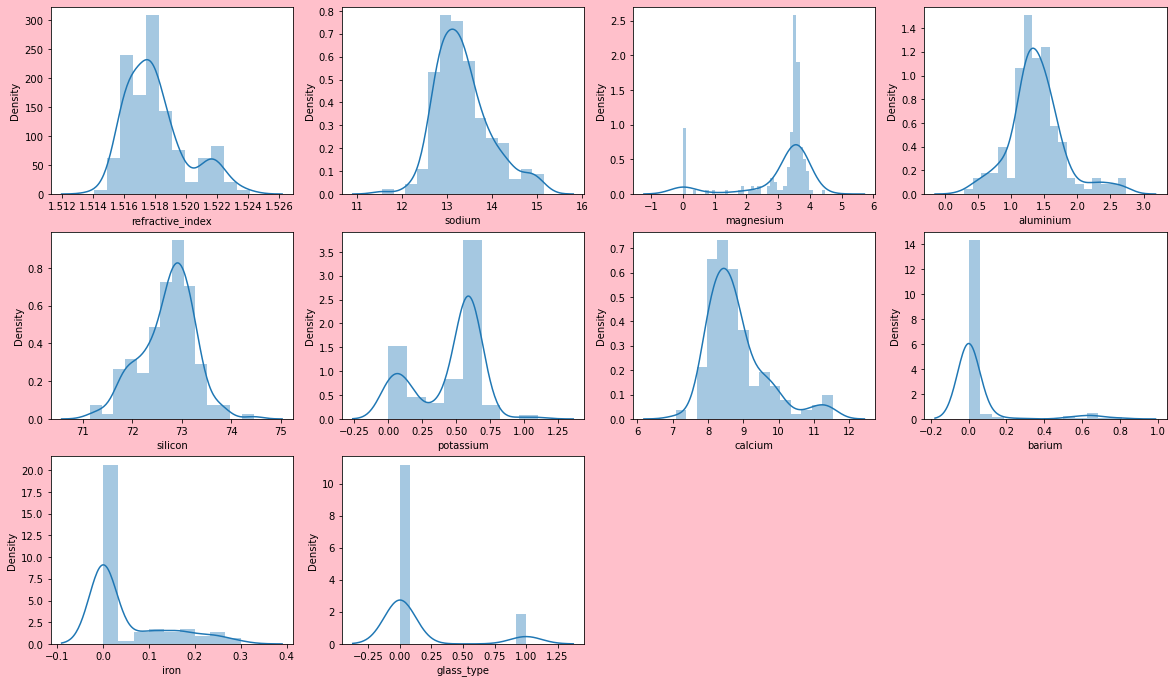

In [29]:
plt.figure(figsize=(20,20),facecolor = 'pink')
plotnumber=1
for column in df:
    if plotnumber<=11:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [ ]:
## Now we have to check the heatmap to enusre the multi-collinearity problem

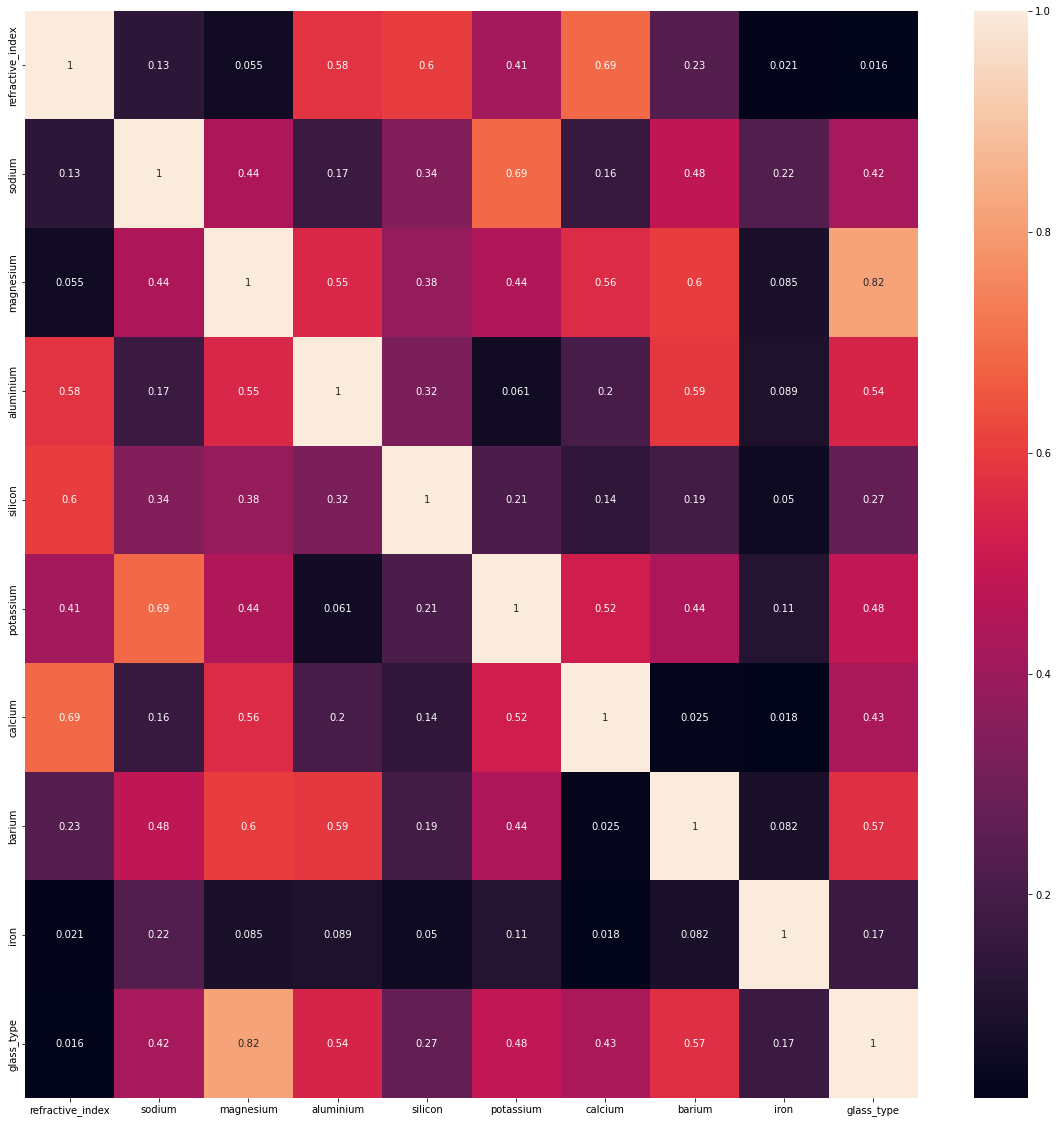

In [30]:
df_corr = df.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(df_corr,annot = True)
plt.show()

In [ ]:
. sodium vs potassium and calcium vs refractive_index do show high collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

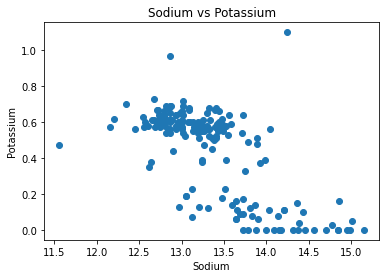

In [31]:
## Lets check scatterplot

plt.scatter(df['sodium'], df['potassium'])
plt.xlabel('Sodium')
plt.ylabel('Potassium')
plt.title('Sodium vs Potassium')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

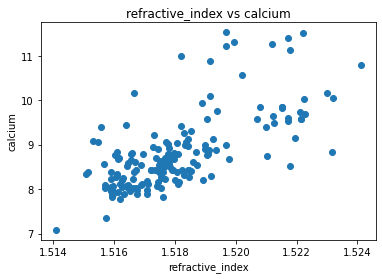

In [32]:
plt.scatter(df['refractive_index'], df['calcium'])
plt.xlabel('refractive_index')
plt.ylabel('calcium')
plt.title('refractive_index vs calcium')
plt.show

In [ ]:
## Lets seprate out target and feature variables

In [33]:
x = df.drop(columns = ['glass_type'])
y = df['glass_type']

In [34]:
x

,refractive_index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
199,1.51609,15.01,0.00,2.51,73.05,0.05,8.83,0.53,0.0
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.0
202,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.0
204,1.51617,14.95,0.00,2.27,73.30,0.00,8.71,0.67,0.0


In [35]:
y

0      0
1      0
2      0
3      0
4      0
      ..
199    1
200    1
202    1
204    1
208    1
Name: glass_type, Length: 175, dtype: int64

In [ ]:
## Now,for accurate predictions, we need to balance our target variable.
## Check balance using Counter

In [36]:
from collections import Counter
Counter(y)

Counter({0: 150, 1: 25})

In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
x_train1,x_test,y_train1,y_test = train_test_split(x,y,test_size=0.25,random_state=69)

In [39]:
Counter(y_train1)

Counter({0: 112, 1: 19})

In [40]:
sm= SMOTE(sampling_strategy=0.8)

In [41]:
x_train,y_train = sm.fit_resample(x_train1,y_train1)

print('Classes before fit{} '.format(Counter(y_train1)))
print('Classes after fit{} '.format(Counter(y_train)))

Classes before fitCounter({0: 112, 1: 19}) 
Classes after fitCounter({0: 112, 1: 89}) 


In [ ]:
Now we have balanced our target variable, we can begin Model Training and Testing

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(x_train,y_train)

LogisticRegression()

In [44]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {accuracy_score(y_test,pred)*100:.2f}%')
        print('\n \n TEST CLASSIFICATION REPORT \n', classification_report(y_test,pred,digits =2))

In [45]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 96.02%

 ======TESTING RESULT======
Accuracy Score: 93.18%

 
 TEST CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.67      1.00      0.80         6

    accuracy                           0.93        44
   macro avg       0.83      0.96      0.88        44
weighted avg       0.95      0.93      0.94        44



In [ ]:
We can see our Training Accuracy with Logistic Regression: 96.02% and Testing is: 93.18% and its a good score and as out training and testing data are very close, we say that 
model is not overfitting.

In [ ]:
Now we should test the data on other models as well to check which model is giving us the best result

In [46]:
from xgboost import XGBClassifier
knn = KNeighborsClassifier()
dec = DecisionTreeClassifier()
ran = RandomForestClassifier()
xgb = XGBClassifier()

In [47]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [ ]:
## Checking other models

In [48]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.9318181818181818
0.9318181818181818
0.9545454545454546
0.9545454545454546
0.9545454545454546


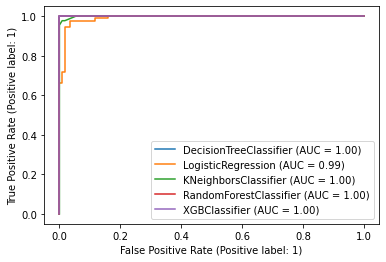

In [49]:
## We should check the ROC AOC curve to best fit model

disp = plot_roc_curve(dec,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(knn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(ran,x_train,y_train,ax=disp.ax_)
plot_roc_curve(xgb,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

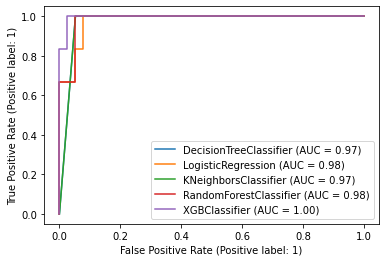

In [50]:
#ROC-AUC CURVE FOR TESTING
disp = plot_roc_curve(dec,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ran,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [ ]:
We can see that from above graphs:

All our models perform very good with both testing and training data
Although perfect learning rate, the accuracy for Decision Tree, KNeghbors is very slightly lower comparison: Model is Overfitting a bit more than others.
Logistic Regression, XGB and Random Forest allare very accurate models with minimal overfitting.
Log Regression or XGB will be my model of choice Random Forest can also be considered.
